
Enríquez Hernández Leobardo 


Ejercicio 1.

1. b) Solución.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
E={0:"0", 1:"1", 2:"2",3:"3"} #Espacio de estados
E #Para ver el espacio de estados

{0: '0', 1: '1', 2: '2', 3: '3'}

In [3]:
p=0.75 #probabilidad p (cambiar para varios valores, aquí optamos por 0.75, 0.5 y 0.25)
P=np.array([[1-p, p, 0, 0],[0,0,1-p,p],[1-p,p,0,0],[0,1,0,0]]) #Matriz de probabilidades de transición.
P #para ver la matriz de probabilidades de transición P.

array([[0.25, 0.75, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.75],
       [0.25, 0.75, 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ]])

In [4]:
#Simulación de la cadena
M=100 #número de pasos (en este caso usaremos 100 y 1000)
start_state=0 #Estado inicial
print(E[start_state], "→", end=" ")
prev_state=start_state

recorrido=[]
while M-1:
    curr_state=np.random.choice([0,1,2,3], p=P[prev_state])
    print(E[curr_state], "→", end=" ")
    prev_state=curr_state
    M-=1
    recorrido.append(prev_state)
print("DETENER")


0 → 1 → 3 → 1 → 3 → 1 → 2 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 2 → 1 → 3 → 1 → 2 → 0 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 2 → 1 → 3 → 1 → 2 → 0 → 1 → 2 → 0 → 0 → 0 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 2 → 0 → 1 → 3 → 1 → 3 → 1 → 2 → 0 → 1 → 3 → 1 → 3 → 1 → 3 → 1 → 2 → 1 → 3 → 1 → 3 → DETENER


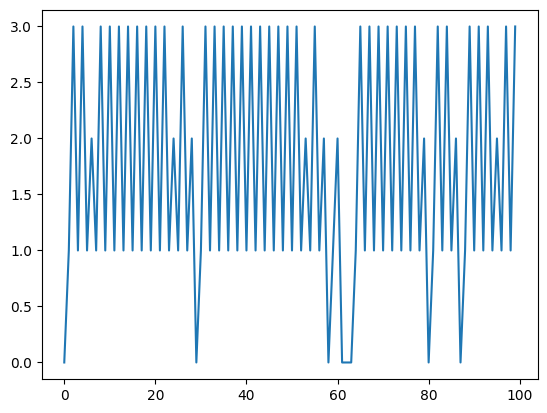

In [5]:
#Graficar
recorrido.insert(0, start_state)
recorrido_final=pd.DataFrame(recorrido)
recorrido_final.columns = ['recorrido']
plt.plot(recorrido_final.index, recorrido_final['recorrido'])
plt.show()

1. c.i) Solución para $100$ pasos y distintos valores de $p\in \{0.75, 0.5, 0.25\}$.

In [18]:
#Distribución estacionaria
#Método: Monte Carlo
p=0.75 #probabilidad p (cambiar para varios valores)
P=np.array([[1-p, p, 0, 0],[0,0,1-p,p],[1-p,p,0,0],[0,1,0,0]]) #Matriz de probabilidades de transición.

M=100 #Número de pasos
start_state=0 #Estado inicial
pi=np.array([0,0,0,0]) #Variable que contendrá la distribución estacionaria
pi[start_state]=1
prev_state=start_state #variable del estado anterior

i=0
while i<M:
    curr_state=np.random.choice([0,1,2,3], p=P[prev_state])
    pi[curr_state]+=1
    prev_state=curr_state
    i+=1
print("Número de visitas de los estados = ", pi)
print("Probabilidad Estacionaria = ", pi/M) #Probabilidad estacionaria


Número de visitas de los estados =  [10 46 14 31]
Probabilidad Estacionaria =  [0.1  0.46 0.14 0.31]


In [7]:
#Distribución estacionaria
#Método: Repeated Matrix Multiplication
p=0.5 #probabilidad p (cambiar para varios valores)
P=np.array([[1-p, p, 0, 0],[0,0,1-p,p],[1-p,p,0,0],[0,1,0,0]]) #Matriz de probabilidades de transición.

M=100 #Número de pasos
P_n=P

i=0
while i<M:
    P_n=np.matmul(P_n,P)
    i+=1
    
print("P^n=  \n", P_n, "\n")
print("Probabilidad Estacionaria =", P_n[0])



P^n=  
 [[0.2 0.4 0.2 0.2]
 [0.2 0.4 0.2 0.2]
 [0.2 0.4 0.2 0.2]
 [0.2 0.4 0.2 0.2]] 

Probabilidad Estacionaria = [0.2 0.4 0.2 0.2]


In [8]:
#Distribución estacionaria
#Método: Finding Left Eigen Vectors
p=0.25 #probabilidad p (cambiar para varios valores)
P=np.array([[1-p, p, 0, 0],[0,0,1-p,p],[1-p,p,0,0],[0,1,0,0]]) #Matriz de probabilidades de transición.

import scipy.linalg
values, left=scipy.linalg.eig(P, right=False, left=True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)

pi=left[:,0]
pi_normalized=[(x/np.sum(pi)).real for x in pi]
print("Probabilidad Estacionaria =", pi_normalized)

left eigen vectors = 
 [[-8.70062840e-01 -3.98017671e-01  7.07106781e-01 -8.40370643e-01]
 [-3.86694596e-01 -5.40026066e-01  2.29023974e-16  2.06460630e-01]
 [-2.90020947e-01  7.03532802e-01 -7.07106781e-01  4.75432510e-01]
 [-9.66736489e-02  2.34510934e-01 -1.21180057e-17  1.58477503e-01]] 

eigen values = 
 [ 1.00000000e+00+0.j -5.75693909e-01+0.j -4.98539399e-17+0.j
  3.25693909e-01+0.j]
Probabilidad Estacionaria = [0.5294117647058817, 0.23529411764705918, 0.17647058823529443, 0.0588235294117648]


1. c.ii) Solución para $1000$ pasos y distintos valores de $p\in \{0.75, 0.5, 0.25\}$.

In [9]:
#Distribución estacionaria
#Método: Monte Carlo
p=0.75 #probabilidad p (cambiar para varios valores)
P=np.array([[1-p, p, 0, 0],[0,0,1-p,p],[1-p,p,0,0],[0,1,0,0]]) #Matriz de probabilidades de transición.

M=1000 #Número de pasos
start_state=0 #Estado inicial
pi=np.array([0,0,0,0]) #Variable que contendrá la distribución estacionaria
pi[start_state]=1
prev_state=start_state #variable del estado anterior

i=0
while i<M:
    curr_state=np.random.choice([0,1,2,3], p=P[prev_state])
    pi[curr_state]+=1
    prev_state=curr_state
    i+=1
print("Número de visitas de los estados = ", pi)
print("Probabilidad Estacionaria = ", pi/M) #Probabilidad estacionaria

Número de visitas de los estados =  [ 47 477 114 363]
Probabilidad Estacionaria =  [0.047 0.477 0.114 0.363]


In [10]:
#Distribución estacionaria
#Método: Repeated Matrix Multiplication
p=0.5 #probabilidad p (cambiar para varios valores)
P=np.array([[1-p, p, 0, 0],[0,0,1-p,p],[1-p,p,0,0],[0,1,0,0]]) #Matriz de probabilidades de transición.

M=1000 #Número de pasos
P_n=P

i=0
while i<M:
    P_n=np.matmul(P_n,P)
    i+=1
    
print("P^n=  \n", P_n, "\n")
print("Probabilidad Estacionaria =", P_n[0])

P^n=  
 [[0.2 0.4 0.2 0.2]
 [0.2 0.4 0.2 0.2]
 [0.2 0.4 0.2 0.2]
 [0.2 0.4 0.2 0.2]] 

Probabilidad Estacionaria = [0.2 0.4 0.2 0.2]


In [11]:
#Distribución estacionaria
#Método: Finding Left Eigen Vectors
p=0.25 #probabilidad p (cambiar para varios valores)
P=np.array([[1-p, p, 0, 0],[0,0,1-p,p],[1-p,p,0,0],[0,1,0,0]]) #Matriz de probabilidades de transición.

import scipy.linalg
values, left=scipy.linalg.eig(P, right=False, left=True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)

pi=left[:,0]
pi_normalized=[(x/np.sum(pi)).real for x in pi]
print("Probabilidad Estacionaria =", pi_normalized)

left eigen vectors = 
 [[-8.70062840e-01 -3.98017671e-01  7.07106781e-01 -8.40370643e-01]
 [-3.86694596e-01 -5.40026066e-01  2.29023974e-16  2.06460630e-01]
 [-2.90020947e-01  7.03532802e-01 -7.07106781e-01  4.75432510e-01]
 [-9.66736489e-02  2.34510934e-01 -1.21180057e-17  1.58477503e-01]] 

eigen values = 
 [ 1.00000000e+00+0.j -5.75693909e-01+0.j -4.98539399e-17+0.j
  3.25693909e-01+0.j]
Probabilidad Estacionaria = [0.5294117647058817, 0.23529411764705918, 0.17647058823529443, 0.0588235294117648]
